# Pêndulo de Newton

*Modelagem e Simulação do Mundo Físico*

Grupo: Antônio Amaral, Arthur Barreto, Ana Laiz Farias, Luan Cintra

*#Importando Bibliotecas*

In [201]:
#Numpy
import numpy as np
#MatPlotLib
import matplotlib.pyplot as plt
#Math
from math import *
#Solve_IVP
from scipy.integrate import solve_ivp

*#Medidas Padrões*

In [202]:
L = 0.06
g = 10
m = 0.0064
D = 0.04
K = 0.92

*#Modelo*

In [203]:
def modelo(t,lista):
    x = lista[0]
    y = lista[1]
    vx = lista[2]
    vy = lista[3]
    v = sqrt( vx**2 + vy**2 )
    cosseno = ( L - y ) / L
    seno = - x / L
    T = m * g * cosseno + m * v**2 / L
    dxdt = vx
    dydt = vy
    dvxdt = T / m * seno
    dvydt = - g + T / m * cosseno
    
    return [ dxdt , dydt , dvxdt , dvydt ]
    
def cond_parada(t, lista):
    return lista[0]

cond_parada.terminal = True

def encontra_t_max(lista_t,lista_y):
    ymax = lista_y[0]
    tmax = 0
    for i in range(len(lista_t)):
        if lista_y[i]>ymax:
            ymax = lista_y[i]
            tmax = lista_t[i]
    return tmax

*#Calculos*

In [204]:
L = 0.06 #Comprimento de L
x_0 = -7.344e-2 #X Inicial
y_0 = 2.725e-2 #Y Inicial

sen = y_0/L #Calculando Seno
cos = sqrt(1 - sen**2) #Calculando Cosseno

*#Testando Execução Bilateral*

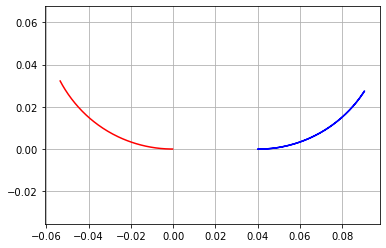

In [205]:
tf = 2 #Tempo Final
dt = 1e-3 #Delta Tempo
t_span = ( 0 , tf )
lista_t = np.arange( 0, tf, dt)

CI = [ -L*cos, L*sen+0.005 , 0 , 0 ] #Condições Iniciais

solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

lista_x = solucao.y[ 0 , : ] #X
lista_y = solucao.y[ 1 , : ] #Y
lista_vx = solucao.y[ 2 , : ] #VX

plt.plot( lista_x , lista_y , 'r')

CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

lista_x = solucao.y[ 0 , : ] + D  # D FOI SOMADO PARA REPRESENTAR A POSIÇÃO DA BOLINHA DA DIREITA
lista_y = solucao.y[ 1 , : ]

plt.plot( lista_x , lista_y, 'b')
plt.grid()
plt.axis("equal")
plt.show()

### Implementação do Modelo com Perda de energia

*#Introduzindo Listas*

In [206]:
lista_ymax = []
lista_t_ymax = []

*#Variaveis*

In [207]:
tfinal = 0

*#Condições Iniciais*

In [208]:
CI = [ -L*cos , L*sen+0.005 , 0 , 0 ]

*#Loop Principal*

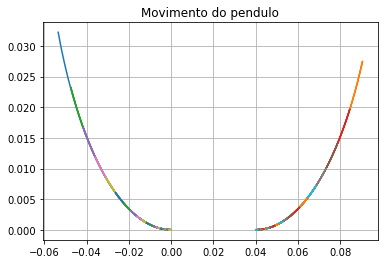

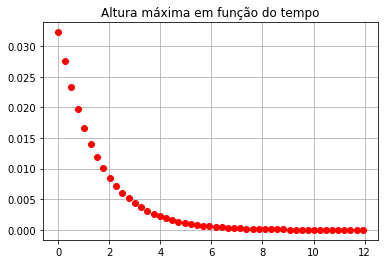

In [209]:
for i in range(50):

    if i%2 == 0 :

        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ]
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]

        lista_ymax.append(max(lista_y))
        lista_t_ymax.append(encontra_t_max( solucao.t , lista_y ) + tfinal)

        tfinal = tfinal + solucao.t[-1]
        
        plt.plot( lista_x , lista_y ) 

        CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]
        
    else:
    
        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ] + D
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]

        lista_ymax.append(max(lista_y))
        lista_t_ymax.append(encontra_t_max( solucao.t , lista_y ) + tfinal)

        tfinal = tfinal + solucao.t[-1]
        
        plt.plot( lista_x , lista_y ) 
        
        CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]

#Plot Gráfico
#Movimento do Pendulo
plt.title("Movimento do pendulo")
plt.grid(True)
plt.show() 

#Altura Máxima em Função do Tempo
plt.plot( lista_t_ymax , lista_ymax, 'ro' )
plt.title("Altura máxima em função do tempo")
plt.grid(True)
plt.show() 



### Validação do Modelo

*#Importações*

In [210]:
import pandas

*#Recebendo e Definindo Medidas Experimentais*

In [211]:
colunas = ["t","x","y"] #,"vx","vy"]
datae = pandas.read_csv("Dados_MassA.csv",names = colunas)
datad = pandas.read_csv("Dados_MassB.csv",names = colunas)

te = datae.t.tolist()
# ajustar a origem no eixo do tempo

t_e = []
for t in te:
    t_e.append(t - 8.133)
    
xe = datae.x.tolist()
ye = datae.y.tolist()
# VAMOS CALCULAR A ALTURA MÁXIMA DE CADA COLISÃO
y_e_max = [ye[0],ye[33],ye[66],ye[98],ye[128],ye[161],ye[193],ye[224],ye[258],ye[289]]  
t_e_ok = [t_e[0],t_e[33],t_e[66],t_e[98],t_e[128],t_e[161],t_e[193],t_e[224],t_e[258],t_e[289]]

# ajustar a origem no eixo do tempo para o lado direito
td = datad.t.tolist()

t_d = []
for t in td:
    t_d.append(t - 8.275)
        
xd = datad.x.tolist()
yd = datad.y.tolist()
y_d_max = [yd[18],yd[50],yd[82],yd[115],yd[147],yd[179],yd[210],yd[240],yd[273],yd[305]]
t_d_ok = [t_d[18],t_d[50],t_d[82],t_d[115],t_d[147],t_d[179],t_d[210],t_d[240],t_d[273],t_d[305]]

# print(ye[0])
# print(lista_ymax[0])
d = lista_ymax[0] - ye[0]
#print("Devemos deslocar {} no eixo".format(d))
y = []
for x in lista_ymax:
    y.append(x - d)


*#Plotando Gráficos*

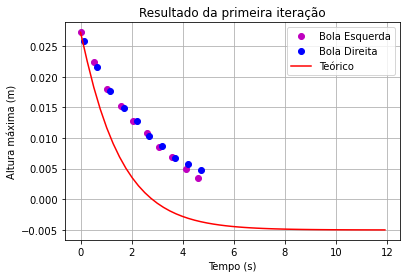

In [212]:
plt.title("Resultado da primeira iteração")
plt.plot(t_e_ok,y_e_max,"mo", label = "Bola Esquerda")
plt.plot(t_d_ok,y_d_max,"bo", label = "Bola Direita")
plt.plot(lista_t_ymax , y, 'r', label = "Teórico")
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Altura máxima (m)")
plt.grid(True)
plt.show()

#### Verificando Qual a Melhor Constante de Perda (K)

*#Criando Lista de K*

In [213]:
lisK = np.arange(0.96,0.965,0.001)

*#Loop Principal*

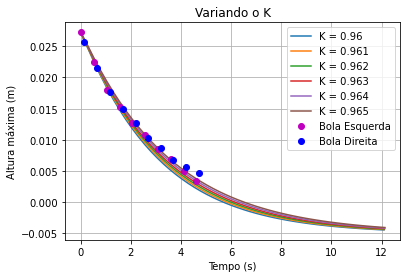

In [214]:
for K in lisK:
    
    CI = [ -L*cos , L*sen + 0.005, 0 , 0 ]
    
    lista_ymax_1 = []
    lista_t_ymax_1 = []
    tfinal_1 = 0

    for i in range(50):

        if i%2 == 0 :

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

            lista_x = solucao.y[ 0 , : ]
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            lista_ymax_1.append(max(lista_y))
            lista_t_ymax_1.append(encontra_t_max( solucao.t , lista_y ) + tfinal_1)

            tfinal_1 = tfinal_1 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

        else:

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

            lista_x = solucao.y[ 0 , : ] + D
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            lista_ymax_1.append(max(lista_y))
            lista_t_ymax_1.append(encontra_t_max( solucao.t , lista_y ) + tfinal_1)

            tfinal_1 = tfinal_1 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]
            
    # agora plotar os graficos corretos
    
    y = []
    for x in lista_ymax_1:
        y.append(x - d)
    
    plt.plot( lista_t_ymax_1 , y, label = "K = {}".format(K))

#Plot Gráfico - Variação de K
plt.plot(t_e_ok,y_e_max,"mo", label = "Bola Esquerda")
plt.plot(t_d_ok,y_d_max,"bo", label = "Bola Direita") 
plt.title("Variando o K")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura máxima (m)")
plt.grid(True)
plt.legend()
plt.show()

#### Criando Modelo com K Calibrado

*#Listas*

In [215]:
lista_ymax_2 = []
lista_t_ymax_2 = []
y1 = []

*#Condições Iniciais*

In [216]:
CI = [ -L*cos , L*sen + 0.005, 0 , 0 ]

*#Variaveis*

In [217]:
tfinal_2 = 0
K = 0.963

*#Loop Principal*

6.269000000000001


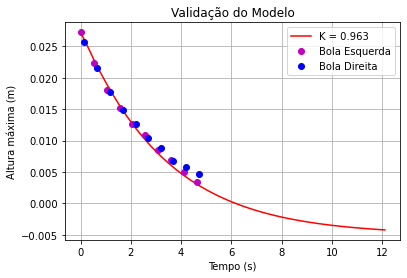

In [218]:
for i in range(50):

    if i%2 == 0 :

        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ]
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]
        
        lista_ymax_2.append(max(lista_y))
        lista_t_ymax_2.append(encontra_t_max( solucao.t , lista_y ) + tfinal_2)

        tfinal_2 = tfinal_2 + solucao.t[-1]

        #plt.plot( lista_x , lista_y ) 

        CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

    else:

        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ] + D
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]

        lista_ymax_2.append(max(lista_y))
        lista_t_ymax_2.append(encontra_t_max( solucao.t , lista_y ) + tfinal_2)

        tfinal_2 = tfinal_2 + solucao.t[-1]

        #plt.plot( lista_x , lista_y ) 

        CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]

# agora plotar os graficos corretos


for x in lista_ymax_2:
    y1.append(x - d)

for i in range(0,len(y1)):
    if y1[i] <= 0:
        print(lista_t_ymax_2[i])
        break
        
#print(lista_t_ymax_2)
          
plt.plot( lista_t_ymax_2 , y1, "r", label = "K = {}".format(K))
plt.plot(t_e_ok,y_e_max,"mo", label = "Bola Esquerda")
plt.plot(t_d_ok,y_d_max,"bo", label = "Bola Direita") 
plt.title("Validação do Modelo")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura máxima (m)")
plt.grid(True)
plt.legend()
plt.show() 

### Gráfico Conclusivo do Modelo

*#Importações*

In [97]:
# #Ferramentas 3D
# from mpl_toolkits.mplot3d import Axes3D
# #MatPlotLib
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# %matplotlib qt5

*#Listas*

In [98]:
# #Lista de Alpha (Massas)
# lista_alpha = np.linspace(6.4e-3,8,10)
# #Lista de Beta (K)
# lista_beta = np.linspace(0,1,10)
# #Lista de Máximo
# ListaMaximo = []

# print(len(lista_beta),len(lista_alpha))

## Modelo

*Neste Modelo acrescentamos a opção de variar a massa das bolas do Pêndulo*

In [172]:
def modelo1(t,lista,M):
    x = lista[0]
    y = lista[1]
    vx = lista[2]
    vy = lista[3]
    v = sqrt( vx**2 + vy**2 )
    cosseno = ( L - y ) / L
    seno = - x / L
    T = M * g * cosseno + M * v**2 / L
    dxdt = vx
    dydt = vy
    dvxdt = T / (M * seno)
    dvydt = - g + T / (M * cosseno)
    Dxdt = [dxdt,dydt,dvxdt,dvydt]
    return Dxdt
def cond_parada(t, lista,M):
    return lista[0]

cond_parada.terminal = True

In [173]:
# Função auxiliar para calcular o tempo onde a altura máxima do sistema é nula

def calcula_periodo(lista_y,lista_t):
    for i in range(0,len(lista_y)):
        if lista_y[i] <=0:
            return lista_t[i]
            #break
    

*#Loop Principal*

In [174]:
# fig = plt.figure()
# ax = fig.gca(projection = "3d")

# for K in lista_beta:
#     for M in lista_alpha:
#         CI = [ -L*cos , L*sen + 0.005, 0 , 0 ]
#         lista_ymax_3 = []
#         lista_t_ymax_3 = []
#         tfinal_3 = 0
#         for i in range(50):

#             if i%2 == 0:

#                 solucao = solve_ivp( modelo1 , t_span , CI , events = cond_parada , t_eval = lista_t, args = (M,) )

#                 lista_x = solucao.y[ 0 , : ]
#                 lista_y = solucao.y[ 1 , : ]
#                 lista_vx = solucao.y[ 2 , : ]

#                 lista_ymax_3.append(max(lista_y))
#                 lista_t_ymax_3.append(encontra_t_max( solucao.t , lista_y ) + tfinal_3)

#                 tfinal_3 = tfinal_2 + solucao.t[-1]

#                 CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

#             else:

#                 solucao = solve_ivp( modelo1 , t_span , CI , events = cond_parada , t_eval = lista_t, args = (M,) )

#                 lista_x = solucao.y[ 0 , : ] + D
#                 lista_y = solucao.y[ 1 , : ]
#                 lista_vx = solucao.y[ 2 , : ]

#                 lista_ymax_3.append(max(lista_y))
#                 lista_t_ymax_3.append(encontra_t_max( solucao.t , lista_y ) + tfinal_3)

#                 tfinal_3 = tfinal_3 + solucao.t[-1]

#                 CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]


#         y1 = []
#         for x in lista_ymax_2:
#             y1.append(x - d)
        
# X,Y = np.meshgrid(lista_alpha,lista_beta)
# Z = np.array (y1)

# #Plot - Surperficie
# surf = ax.plot_surface(X,Y,Z,cmap = cm.coolwarm, linewidth = 0, antialised=True)

# #Customizando eixo Z
# ax.set_zlim(5, 5)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))



# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.set_xlabel('d1')
# ax.set_ylabel('d2')
# ax.set_zlabel('Máximo de T2')

# plt.show()


In [175]:
# Criar as listas de massas para variar
lisM = np.arange(1,101,1)
print(len(lisM))

100


In [176]:
# lsitas para o novo sistema

lista_ymax_3 = []
lista_t_ymax_3 = []
y3 = []
periodo = []

tfinal_3 = 0
K = 0.963

In [179]:
# agora é a hora da brincadeira, vamos rodar a solvivp algumas vezes

for M in lisM:
    for i in range(50):

        if i%2 == 0 :

            solucao = solve_ivp( modelo1 , t_span , CI , events = cond_parada , t_eval = lista_t, args = (M,) )
            
            lista_x = solucao.y[ 0 , : ]
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]
            lista_ymax_3.append(max(lista_y))
            lista_t_ymax_3.append(encontra_t_max( solucao.t , lista_y ) + tfinal_3)

            tfinal_3 = tfinal_3 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

        else:

            solucao = solve_ivp( modelo1 , t_span , CI , events = cond_parada , t_eval = lista_t, args =(M,) )

            lista_x = solucao.y[ 0 , : ] + D
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            lista_ymax_3.append(max(lista_y))
            lista_t_ymax_3.append(encontra_t_max( solucao.t , lista_y ) + tfinal_3)

            tfinal_3 = tfinal_3 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]

        # agora plotar os graficos corretos
    

    for x in lista_ymax_3:
        y3.append(x - d)
        
    #print(lista_t_ymax_3)    
    #periodo.append(calcula_periodo(y3,lista_t_ymax_3))
    

#print(periodo)
    
    

[-2.2196602e-165]
[-2.05844406e-165]
[-1.90893721e-165]
[-1.77028919e-165]
[-1.64171131e-165]
[-1.52247218e-165]
[-1.4118935e-165]
[-1.30934627e-165]
[-1.21424714e-165]
[-1.12605515e-165]
[-1.04426864e-165]
[-9.68422365e-166]
[-8.98084881e-166]
[-8.32856078e-166]
[-7.72364908e-166]
[-7.16267272e-166]
[-6.64244064e-166]
[-6.15999353e-166]
[-5.71258704e-166]
[-5.29767613e-166]
[-4.91290062e-166]
[-4.55607173e-166]
[-4.22515969e-166]
[-3.91828211e-166]
[-3.63369337e-166]
[-3.36977458e-166]
[-3.12502449e-166]
[-2.89805083e-166]
[-2.6875625e-166]
[-2.49236215e-166]
[-2.31133939e-166]
[-2.1434645e-166]
[-1.98778253e-166]
[-1.8434079e-166]
[-1.70951934e-166]
[-1.58535524e-166]
[-1.4702093e-166]
[-1.36342653e-166]
[-1.2643995e-166]
[-1.1725649e-166]
[-1.08740034e-166]
[-1.00842136e-166]
[-9.35178713e-167]
[-8.67255748e-167]
[-8.04266095e-167]
[-7.45851445e-167]
[-6.91679508e-167]
[-6.41442134e-167]
[-5.9485355e-167]
[-5.51648742e-167]
[-5.11581942e-167]
[-4.74425234e-167]
[-4.39967255e-167]
[-

[-9.33612353e-180]
[-8.65803154e-180]
[-8.02919005e-180]
[-7.44602195e-180]
[-6.90520993e-180]
[-6.40367763e-180]
[-5.93857212e-180]
[-5.50724769e-180]
[-5.10725078e-180]
[-4.73630605e-180]
[-4.3923034e-180]
[-4.07328601e-180]
[-3.77743918e-180]
[-3.50307999e-180]
[-3.24864779e-180]
[-3.01269525e-180]
[-2.79388018e-180]
[-2.59095787e-180]
[-2.40277401e-180]
[-2.22825813e-180]
[-2.06641752e-180]
[-1.91633154e-180]
[-1.77714647e-180]
[-1.64807054e-180]
[-1.52836953e-180]
[-1.41736252e-180]
[-1.31441807e-180]
[-1.21895057e-180]
[-1.13041697e-180]
[-1.04831365e-180]
[-9.72173585e-181]
[-9.01563646e-181]
[-8.36082177e-181]
[-7.75356692e-181]
[-7.1904176e-181]
[-6.66817038e-181]
[-6.1838545e-181]
[-5.73471496e-181]
[-5.31819688e-181]
[-4.93193092e-181]
[-4.57371985e-181]
[-4.241526e-181]
[-3.93345973e-181]
[-3.64776861e-181]
[-3.38282753e-181]
[-3.13712938e-181]
[-2.90927654e-181]
[-2.69797288e-181]
[-2.50201641e-181]
[-2.32029245e-181]
[-2.15176729e-181]
[-1.99548228e-181]
[-1.85054841e-181

[-4.92367028e-194]
[-4.56605918e-194]
[-4.23442174e-194]
[-3.92687145e-194]
[-3.64165885e-194]
[-3.37716153e-194]
[-3.13187491e-194]
[-2.9044037e-194]
[-2.69345396e-194]
[-2.4978257e-194]
[-2.31640612e-194]
[-2.14816323e-194]
[-1.99213999e-194]
[-1.84744887e-194]
[-1.71326681e-194]
[-1.58883053e-194]
[-1.47343218e-194]
[-1.36641533e-194]
[-1.26717121e-194]
[-1.1751353e-194]
[-1.08978405e-194]
[-1.01063194e-194]
[-9.37228735e-195]
[-8.69156875e-195]
[-8.06029142e-195]
[-7.47486439e-195]
[-6.93195752e-195]
[-6.42848251e-195]
[-5.9615754e-195]
[-5.52858021e-195]
[-5.12703391e-195]
[-4.75465231e-195]
[-4.40931715e-195]
[-4.08906404e-195]
[-3.79207123e-195]
[-3.5166493e-195]
[-3.26123155e-195]
[-3.02436504e-195]
[-2.80470238e-195]
[-2.60099404e-195]
[-2.41208125e-195]
[-2.23688937e-195]
[-2.07442186e-195]
[-1.92375453e-195]
[-1.78403031e-195]
[-1.65445441e-195]
[-1.53428973e-195]
[-1.42285273e-195]
[-1.31950951e-195]
[-1.22367222e-195]
[-1.13479568e-195]
[-1.05237434e-195]
[-9.75939336e-196

[-2.40804118e-208]
[-2.23314274e-208]
[-2.07094735e-208]
[-1.92053237e-208]
[-1.78104218e-208]
[-1.65168331e-208]
[-1.5317199e-208]
[-1.42046955e-208]
[-1.31729943e-208]
[-1.22162265e-208]
[-1.13289498e-208]
[-1.05061168e-208]
[-9.74304705e-209]
[-9.0353998e-209]
[-8.37914968e-209]
[-7.77056366e-209]
[-7.20617985e-209]
[-6.6827878e-209]
[-6.19741024e-209]
[-5.74728614e-209]
[-5.329855e-209]
[-4.9427423e-209]
[-4.58374598e-209]
[-4.25082393e-209]
[-3.94208233e-209]
[-3.65576495e-209]
[-3.39024309e-209]
[-3.14400634e-209]
[-2.91565402e-209]
[-2.70388715e-209]
[-2.50750112e-209]
[-2.32537881e-209]
[-2.15648422e-209]
[-1.99985662e-209]
[-1.85460503e-209]
[-1.71990321e-209]
[-1.59498492e-209]
[-1.47913957e-209]
[-1.37170819e-209]
[-1.27207965e-209]
[-1.17968723e-209]
[-1.09400537e-209]
[-1.01454666e-209]
[-9.40859125e-210]
[-8.72523586e-210]
[-8.09151326e-210]
[-7.50381856e-210]
[-6.95880871e-210]
[-6.45338348e-210]
[-5.98466778e-210]
[-5.54999538e-210]
[-5.14689366e-210]
[-4.77306963e-210]

[-1.269949e-222]
[-1.17771134e-222]
[-1.09217298e-222]
[-1.01284737e-222]
[-9.39283251e-223]
[-8.7106217e-223]
[-8.07796053e-223]
[-7.49125018e-223]
[-6.94715319e-223]
[-6.44257451e-223]
[-5.97464388e-223]
[-5.54069952e-223]
[-5.13827297e-223]
[-4.76507507e-223]
[-4.4189829e-223]
[-4.09802775e-223]
[-3.8003839e-223]
[-3.52435822e-223]
[-3.26838055e-223]
[-3.03099481e-223]
[-2.81085062e-223]
[-2.60669573e-223]
[-2.41736881e-223]
[-2.2417929e-223]
[-2.07896924e-223]
[-1.92797162e-223]
[-1.78794112e-223]
[-1.65808117e-223]
[-1.53765307e-223]
[-1.42597179e-223]
[-1.32240203e-223]
[-1.22635465e-223]
[-1.13728329e-223]
[-1.05468127e-223]
[-9.7807871e-224]
[-9.07039876e-224]
[-8.41160662e-224]
[-7.80066322e-224]
[-7.23409325e-224]
[-6.70867383e-224]
[-6.22141614e-224]
[-5.76954846e-224]
[-5.35050039e-224]
[-4.96188819e-224]
[-4.60150129e-224]
[-4.26728965e-224]
[-3.95735214e-224]
[-3.66992569e-224]
[-3.40337532e-224]
[-3.15618477e-224]
[-2.92694791e-224]
[-2.71436076e-224]
[-2.51721402e-224]


[-5.34153867e-237]
[-4.95357737e-237]
[-4.5937941e-237]
[-4.26014224e-237]
[-3.95072385e-237]
[-3.66377882e-237]
[-3.3976749e-237]
[-3.15089838e-237]
[-2.92204548e-237]
[-2.70981439e-237]
[-2.51299786e-237]
[-2.33047631e-237]
[-2.16121149e-237]
[-2.00424054e-237]
[-1.85867054e-237]
[-1.72367344e-237]
[-1.59848132e-237]
[-1.48238202e-237]
[-1.37471513e-237]
[-1.2748682e-237]
[-1.18227325e-237]
[-1.09640356e-237]
[-1.01677067e-237]
[-9.429216e-238]
[-8.74436261e-238]
[-8.10925081e-238]
[-7.52026782e-238]
[-6.97406324e-238]
[-6.46753006e-238]
[-5.99778688e-238]
[-5.56216162e-238]
[-5.15817626e-238]
[-4.78353276e-238]
[-4.43609999e-238]
[-4.11390161e-238]
[-3.81510483e-238]
[-3.53800995e-238]
[-3.28104075e-238]
[-3.04273548e-238]
[-2.82173856e-238]
[-2.61679286e-238]
[-2.42673258e-238]
[-2.25047657e-238]
[-2.0870222e-238]
[-1.93543969e-238]
[-1.79486677e-238]
[-1.6645038e-238]
[-1.54360923e-238]
[-1.43149535e-238]
[-1.32752441e-238]
[-1.23110498e-238]
[-1.1416886e-238]
[-1.05876661e-238]
[